In [1]:
import pickle 
from IPython.display import display

from capstone_project import preprocessor as pre

%matplotlib inline

In [2]:
def load_pickle(filename):
    with open (filename, "rb") as handle:
        return pickle.load(handle)

In [3]:
file_directory = "../output/data/"
prefix = ""

train_data = load_pickle(file_directory+prefix+"preprocessed_train_data.pkl") 

In [4]:
train_data = train_data[:100]

In [5]:
display(train_data.head(1))

,id,qid1,qid2,question1,question2,is_duplicate,q1_tokens,q2_tokens,q1_word2vec,q2_word2vec
218104,218104,430027,430028,How do I build a self confidence?,How can I raise my self esteem?,1,"[build, self, confidence]","[raise, self, esteem]","[[-0.143555, 0.216797, 0.0388184, 0.0898438, -...","[[-0.027832, -0.0922852, -0.134766, 0.237305, ..."


In [6]:
feature_engineering = pre.FeatureTransformer()

feature_df = feature_engineering.transform(train_data)

,q1_len,q2_len,q1_n_words,q2_n_words,word_share
218104,33,31,3,3,0.333333


,q1_len,q2_len,q1_n_words,q2_n_words,word_share
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,60.590000,60.080000,5.540000,5.610000,0.472139
std,28.432481,29.925051,2.962459,3.329983,0.281274
min,22.000000,16.000000,1.000000,1.000000,0.000000
25%,40.750000,41.000000,4.000000,3.000000,0.265625
50%,50.000000,54.000000,5.000000,5.000000,0.448529
75%,77.500000,70.500000,7.000000,7.000000,0.708333
max,168.000000,200.000000,18.000000,18.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b1332b750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9abd2da250>]], dtype=object)

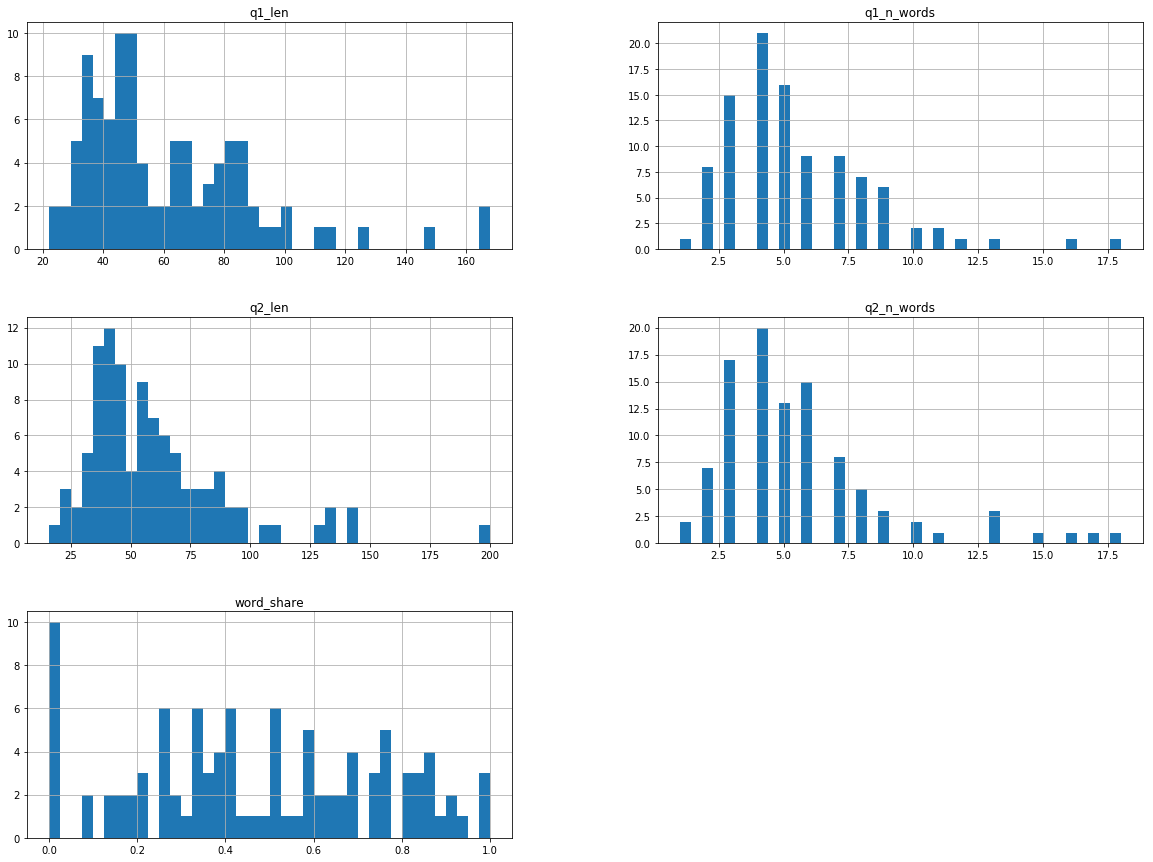

In [7]:
display(feature_df.head(1))
display(feature_df.describe())

feature_df.hist(bins=40, figsize=[20,15])

              q1_len    q2_len  q1_n_words  q2_n_words  word_share
q1_len      1.000000  0.482282    0.906145    0.498545   -0.195906
q2_len      0.482282  1.000000    0.499022    0.902363   -0.217490
q1_n_words  0.906145  0.499022    1.000000    0.617492   -0.206659
q2_n_words  0.498545  0.902363    0.617492    1.000000   -0.226182
word_share -0.195906 -0.217490   -0.206659   -0.226182    1.000000

Skewness: [ 1.4959402   1.7776221   1.51297603  1.693385    0.00289776]
Normaltest p-values: [  5.05873276e-07   1.93224286e-08   4.14259496e-07   5.08154518e-08
   9.89953447e-01]


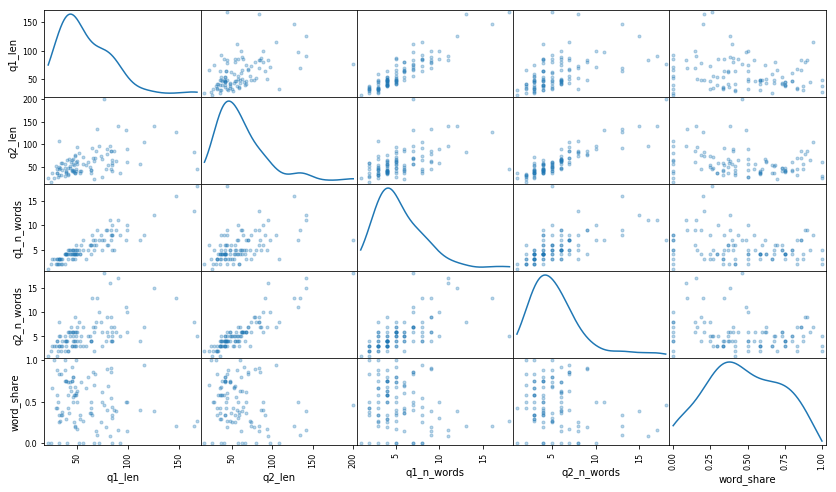

In [8]:
import pandas as pd
from scipy import stats
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(feature_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
print(feature_df.corr()) 

skewness = stats.skew(feature_df, axis=0)
k2_vals, p_vals = stats.skewtest(feature_df, axis=0)
print("\nSkewness: {}").format(skewness)
print("Normaltest p-values: {}").format(p_vals)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_features = mms.fit_transform(X_train)